<a href="https://colab.research.google.com/github/ManishSharma2002/Deep-learning-/blob/main/multi_layer_perceptron_using_binery_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/drive/MyDrive/deep learning/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns=["RowNumber","CustomerId","Surname"], inplace = True)

In [5]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
df["Gender"].value_counts()

,count
Gender,
Male,5457
Female,4543


In [7]:
df["Exited"].value_counts()


,count
Exited,
0,7963
1,2037


In [8]:
df["Geography"].value_counts()


,count
Geography,
France,5014
Germany,2509
Spain,2477


In [9]:
df.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder
df = pd.get_dummies(df,columns = ["Gender","Geography"],drop_first=True)

In [14]:
x = df.drop(columns=['Exited'])
y = df['Exited']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=15)

In [16]:
x_train.shape,x_test.shape

((8000, 11), (2000, 11))

In [17]:
y_train.shape,y_test.shape

((8000,), (2000,))

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)


In [19]:
x_test_sc = sc.transform(x_test)

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [67]:
model = Sequential()
model.add(Dense(11, activation = "relu" ,input_dim = 11 ))
model.add(Dense(3, activation = "relu"  ))
model.add(Dense(1 ,activation = "sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 172 (688.00 B)

 Trainable params: 172 (688.00 B)

 Non-trainable params: 0 (0.00 B)

In [71]:
model.compile(loss = "binary_crossentropy" ,optimizer="Adam",metrics = ["accuracy"])

In [76]:
model.fit(x_train_sc,y_train,epochs = 50)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8664 - loss: 0.3208
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8633 - loss: 0.3256
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8600 - loss: 0.3297
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8659 - loss: 0.3290
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8631 - loss: 0.3240
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8635 - loss: 0.3240
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8639 - loss: 0.3238
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8633 - loss: 0.3289
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8658 - loss: 0.3238
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8713 - loss: 0.3168
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8740 - loss: 0.3087
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [97]:
history = model.fit(x_train_sc,y_train,epochs = 100,validation_split = 0.2)


Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8715 - loss: 0.3085 - val_accuracy: 0.8587 - val_loss: 0.3552
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8727 - loss: 0.3098 - val_accuracy: 0.8581 - val_loss: 0.3536
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8726 - loss: 0.3067 - val_accuracy: 0.8587 - val_loss: 0.3553
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8757 - loss: 0.3045 - val_accuracy: 0.8587 - val_loss: 0.3551
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8566 - loss: 0.3226 - val_accuracy: 0.8587 - val_loss: 0.3548
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8707 - loss: 0.3101 - val_accuracy: 0.8575 - val_loss: 0.3547
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8705 - loss: 0.3134 - val_accuracy: 0.8562 - val_loss: 0.3544
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8822 - loss: 0.2961 - val_accu

In [98]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [99]:
history.history

{'accuracy': [0.8707812428474426,
  0.87109375,
  0.8693749904632568,
  0.87109375,
  0.8689062595367432,
  0.8695312738418579,
  0.8709375262260437,
  0.87109375,
  0.8693749904632568,
  0.8707812428474426,
  0.8707812428474426,
  0.8692187666893005,
  0.8701562285423279,
  0.8700000047683716,
  0.87109375,
  0.871874988079071,
  0.8709375262260437,
  0.8712499737739563,
  0.8700000047683716,
  0.8704687356948853,
  0.8698437213897705,
  0.8692187666893005,
  0.8696874976158142,
  0.8717187643051147,
  0.87109375,
  0.8707812428474426,
  0.8709375262260437,
  0.8706250190734863,
  0.8712499737739563,
  0.8704687356948853,
  0.8696874976158142,
  0.8707812428474426,
  0.8712499737739563,
  0.8698437213897705,
  0.8696874976158142,
  0.8700000047683716,
  0.8715624809265137,
  0.8721874952316284,
  0.8693749904632568,
  0.8728125095367432,
  0.8700000047683716,
  0.8690624833106995,
  0.870312511920929,
  0.8712499737739563,
  0.8700000047683716,
  0.8706250190734863,
  0.87124997377395

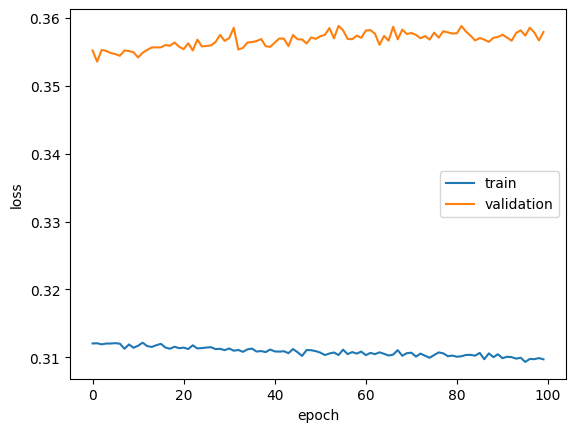

In [100]:
from matplotlib import pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","validation"])
plt.show()

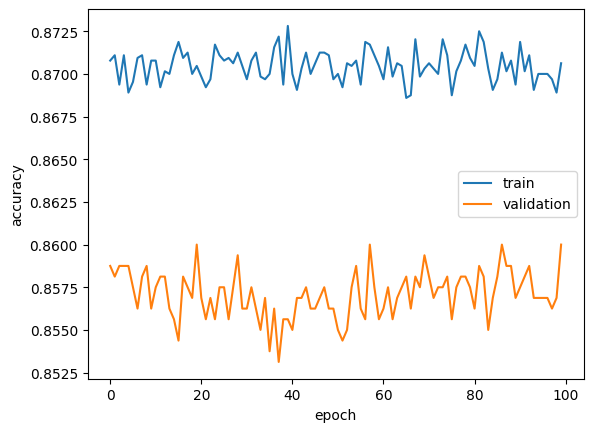

In [101]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","validation"])
plt.show()

In [93]:
model.layers[0].get_weights()

[array([[-0.05567681,  0.18418005, -0.10916577, -0.19208325, -0.11011803,
          0.24046835,  0.05302743, -0.05805252, -0.1575039 , -0.03116458,
          0.03369736],
        [ 0.5293361 , -0.5261842 ,  0.3762166 ,  0.9502614 ,  0.29201472,
         -0.38649035,  0.8372112 , -0.6220467 , -0.06776007, -0.8169411 ,
         -0.8893488 ],
        [ 0.5523716 , -0.02465743,  0.16406044,  0.07870585,  0.05381099,
         -0.2227996 , -0.05886033, -0.01011759,  0.14025363,  0.1666    ,
         -0.24884228],
        [-0.12033555, -1.2467638 , -0.32509306,  0.06048239,  0.300235  ,
          0.27804798, -0.24932629, -0.81429917, -0.18858753, -0.12903062,
          0.17236757],
        [ 0.02987163, -0.2787723 , -1.4760517 , -0.00655583,  1.2808039 ,
         -0.26420325,  0.15802734,  0.46038356, -0.58974344,  0.05301379,
          0.50103706],
        [ 0.20942034,  0.07889377, -0.00754356, -0.08344671, -0.12983236,
          0.12966082,  0.07533883, -0.2484758 , -0.10823607,  0.1481270

In [94]:
y_pred = model.predict(x_test_sc)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.02019731],
       [0.03909284],
       [0.1723875 ],
       ...,
       [0.95596236],
       [0.15123045],
       [0.05577629]], dtype=float32)

In [95]:
y_pred_binary = np.where(y_pred>0.5,1,0)

In [96]:
from sklearn.metrics import accuracy_score
y_pred_binary = np.where(y_pred > 0.5, 1, 0)
accuracy_score(y_pred_binary, y_test)

0.8565